## Import necessary libraries

In [1]:
from nn import nn, preprocess, io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

## Create neural network instance

This is an instance of an autoencoder with two standard layers: an encoding layer and a decoding layer. The input dimensions for the first layer and output dimensions for the second layer are the same because this is essentially trying to recreate the input after passing it through a lower-dimensional latent space. I used a relu activation function for the final layer because its output will be in the range (0,1). Given that we're trying to recreate the pixel intensities for the digits dataset (and the fact that this is not a classification problem), I opted for this function. I used a sigmoid function in the first layer because in conjunction with relu it provided the best observed loss decrease.

The learning rate is extremely small because otherwise the loss starts to increase.

I chose 50 epochs to train the model because by then the model has converged (in terms of loss decrease, at least)

And finally, I chose the mean squared error loss function because the outputs are between 0 and 1, and therefore the BCE loss function would not be applicable here.

In [50]:
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'},
       {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}] # output layer

lr = 0.0001 # Seems like a good place to start
n_seed = 42
batch_size = 1000 
epochs = 50
loss_fun = 'mse'

nn_ae = nn.NeuralNetwork(arch, lr, n_seed, batch_size, epochs, loss_fun)

## Read in the 'digits' dataset using sklearn

In [51]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

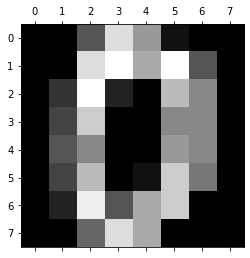

In [52]:
plt.gray()
plt.matshow(digits.images[0])
plt.show() # Let's have a look

In [53]:
X = digits.data
y = digits.target

## Split the 'digits' data into training and validation

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8) # 80/20 ratio is supposedly standard for training/validation in autoencoders so split it like that

## Fit the model

In [55]:
train_loss, val_loss = nn_ae.fit(X_train, X_train, X_val, X_val)

In [56]:
pred = nn_ae.predict(X_val)

## Get the reconstruction error over the held-out validation set

In [57]:
nn_ae._mean_squared_error(pred, X_val)

58.50410528304235

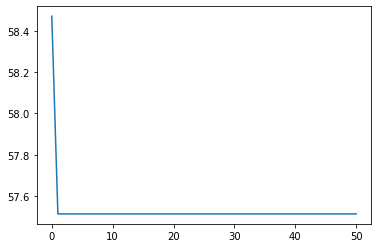

In [58]:
plt.plot(train_loss)
plt.show()

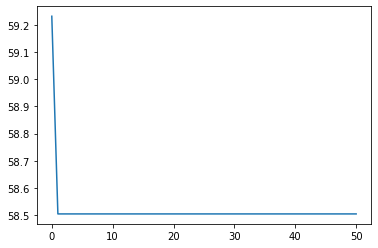

In [59]:
plt.plot(val_loss)
plt.show()